## 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [2]:
data = pd.read_csv(r"C:\Users\91755\Downloads\data1.csv")
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


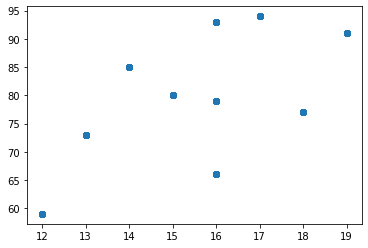

In [4]:
x_val = data['x']
y_val = data['y']
plt.scatter(x_val,y_val)

m=3.1792 c=30.1 MSE=9330.4552 RMSE=96.5942814042322


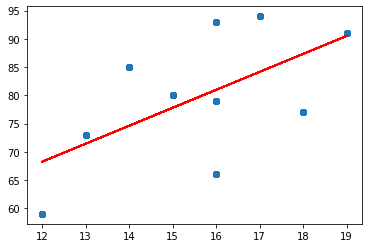

In [5]:
def lin_reg():
    N = len(data)
    x = x_val
    y = y_val
 
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    num = den = 0

    for i in range(N):
        num += (x[i]*y[i]) - (mean_y*x[i])

    for i in range(N):
        den += (x[i]**2) - (mean_x*x[i])

    m = num/den
    m = round(m, 4)

    c = (mean_y - (m*mean_x))
    c = round(c, 2)

    e = 0
    for i in range(N):
        y_cap = m*x[i] + c
        e += (y_cap - y[i])**2

    y1 = m*x + c
    e = round(e, 4)
    rmse = math.sqrt(e)
    print(f"m={m} c={c} MSE={e} RMSE={rmse}")
    plt.scatter(x, y)
    plt.plot(x, y1, "red")
    plt.show()

lin_reg()

## 2

In [6]:
df=pd.read_csv(r"C:\Users\91755\Downloads\house_pred.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
drop=['MiscFeature','Fence','PoolQC','Alley','FireplaceQu']
df.drop(drop,axis=1,inplace=True)

In [10]:
col = df.select_dtypes(include=np.number)
for i in col:
    df[i] = df[i].transform(lambda x: x.fillna(x.mean()))

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

In [12]:
x=df.iloc[:,:-1]
x 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [13]:
y=df.iloc[:,-1]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1338, dtype: int64

In [14]:
obj_cols = x.select_dtypes(include=np.object_).columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
cols=df.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [16]:
x = x.select_dtypes(include=np.number)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
print(reg.intercept_)
print(reg.coef_)

-1747789.899319275
[ 1.09878358e+00 -6.28521143e+01  1.69300290e+02  4.56136636e-01
  1.48172264e+04  6.12138545e+03  2.93056834e+02  2.34150712e+02
  2.42974104e+01  3.25632449e+01  6.28771517e+00  6.44538432e+00
  4.52963444e+01  3.82388162e-01  3.29005603e+01 -2.22283315e+00
  3.10601153e+01 -2.65320290e+03 -9.91057795e+03 -5.95202090e+03
 -4.55533597e+03 -1.21681453e+04 -3.66047145e+04  6.98942582e+03
  5.90995270e+02  3.98942165e+00  5.89813436e+03  2.20278052e+01
  2.27535679e+01  1.75856033e+01 -1.17023547e+00  1.51020148e+01
  5.21643543e+01  8.43795203e+01 -8.31079387e-01  6.82776648e+01
  3.11537075e+02]


In [19]:
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test,y_pred)

0.39538674508823624